# Esercitazione 4 - 11 Marzo 2025
 

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [2]:
import sys
print(sys.float_info)
import numpy as np
import matplotlib.pyplot as plt
import math

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [17]:
beta = 2.0
t = 53 #numero i cifre riservato alla mantissa
p=52
spacing = beta**(p+1-t)


In [24]:
x = beta ** p
y = x + spacing
z = x + 0.5
q = y + 0.5
print('x =' , x , '\ny=' , y, '\nz=' , z , '\nq=',q)

x = 4503599627370496.0 
y= 4503599627370497.0 
z= 4503599627370496.0 
q= 4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [30]:
L=-1021
U=1024

cardin = 2 + (beta-1)*(beta**(t-1))*(U-L+1)*2-1
cardin


1.842872967520007e+19

- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[2^0, 2^1]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$.

In [37]:
eps = 2 ** (-52)
p=0
spacing = beta**(p+1-t)
print(1+spacing)
print(1+spacing/2)
print(eps==spacing)

1.0000000000000002
1.0
True


- **4.** Siano $a=0.1234567890123400 e+16$, $b=-0.1234567890123401 e+16$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [ ]:
a = 0.1234567890123400*10**16
b = -0.1234567890123401*10**16
c = 0.06

print((a+b)+c)
print((a+c)+b)
print(a+(b+c))


-0.94
-1.0
-1.0


In [59]:
a = 0.23371258*10**-4
b = 0.33678429*10**2
c = -0.33677911*10**2

print((a+b)+c)
print((a+c)+b)
print(a+(b+c))
print (a+c)
print(b+c)
print(a+b)

0.0005413712580022434
0.0005413712580022434
0.0005413712579995743
-33.677887628742
0.0005179999999995744
33.678452371258004


- **5** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [54]:
arr1 = np.full(10,0.1)
sum = 0
for x in arr1:
    sum = sum +x

print(sum)

sum2 = np.sum(arr1)
print (sum2)

0.9999999999999999
1.0


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [73]:
f1 = lambda x: np.sqrt(np.square(x)+1)-x
f2 = lambda x: 1 / (np.sqrt(np.square(x)+1) + x)
x1 = 7777
x2 = 77777777
y11 = f1(x1) 
y12 = f1(x2)
y21 = f2(x1)
y22 = f2(x2)
print(y11 , ',' ,y12 , ', ', y21 , ', ', y22 )


6.429214317904552e-05 , 0.0 ,  6.429214323431402e-05 ,  6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}
$$
  Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

<function matplotlib.pyplot.show(close=None, block=None)>

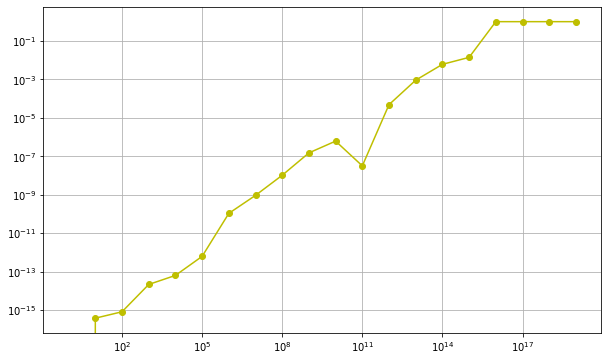

In [129]:
fa = lambda x: (1/x)-1/(x+1)
fb = lambda x: 1/(x*(x+1))
ErrRel=lambda x:np.abs(fb(x)-fa(x))/np.abs(fb(x))
x =np.array([10**x for x in range(0,20)])
#x = np.logspace(0,20,num=21)

plt.figure(figsize=(10,6))
plt.loglog(x,ErrRel(x),'y-',marker='o')
plt.grid('on')
plt.show


- **8.** Scrivere uno script Matplot che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

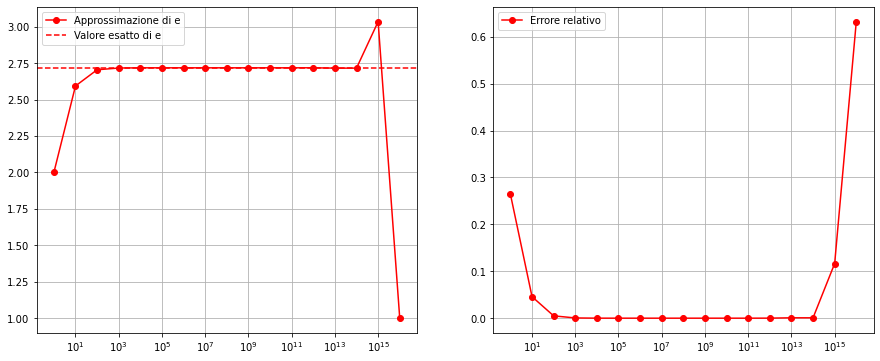

In [32]:
e = math.exp(1)

f = lambda x: (1/x+1)**x
x = np.array([10**x for x in range(0,17)])
ErrRel = lambda x: np.abs(f(x)-e)/np.abs(e)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.semilogx(x,f(x),'ro-', label='Approssimazione di e')
plt.axhline(y=e, color='r', linestyle='--', label='Valore esatto di e')
plt.grid('on')
plt.legend()

plt.subplot(1,2,2)
plt.semilogx(x,ErrRel(x),'ro-',label='Errore relativo')
plt.grid('on')
plt.legend()

plt.show()

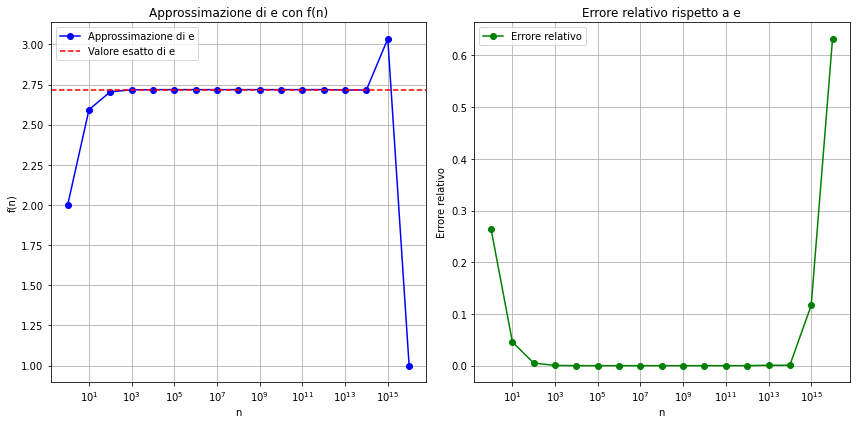

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Valore esatto di e
e_exact = math.exp(1)

# Valori di k
k_values = np.arange(0, 17)
n_values = 10**k_values

# Calcolo delle approssimazioni di e
f_values = [(1 + 1/n)**n for n in n_values]

# Calcolo dell'errore relativo
relative_errors = [abs(f - e_exact) / e_exact for f in f_values]

# Grafico delle approssimazioni di e
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogx(n_values, f_values, 'bo-', label='Approssimazione di e')
plt.axhline(y=e_exact, color='r', linestyle='--', label='Valore esatto di e')
plt.xlabel('n')
plt.ylabel('f(n)')
plt.title('Approssimazione di e con f(n)')
plt.legend()
plt.grid(True)

# Grafico dell'errore relativo
plt.subplot(1, 2, 2)
plt.semilogx(n_values, relative_errors, 'go-', label='Errore relativo')
plt.xlabel('n')
plt.ylabel('Errore relativo')
plt.title('Errore relativo rispetto a e')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()